In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import gym
import time
from tqdm import tqdm
import json
from livelossplot import PlotLosses

In [2]:
# test
f1 = '/media/ghost-083/SolarSystem1/1_Research/00_Transfer-RL/Task_similarity/dataset/Pendulum_dataset_1.json'
json_data = json.load(open(f1))
print('data loaded successfully!')

data loaded successfully!


In [3]:
from utils.utils import get_dataset, CreateTorchDataset
from torch.utils.data import Dataset, DataLoader

custom_dataset = get_dataset(json_data, ds_type='reward')
pendulum_reward_dataset = CreateTorchDataset(custom_dataset, state_dim=3, 
                                    action_dim=1, ds_type='reward')

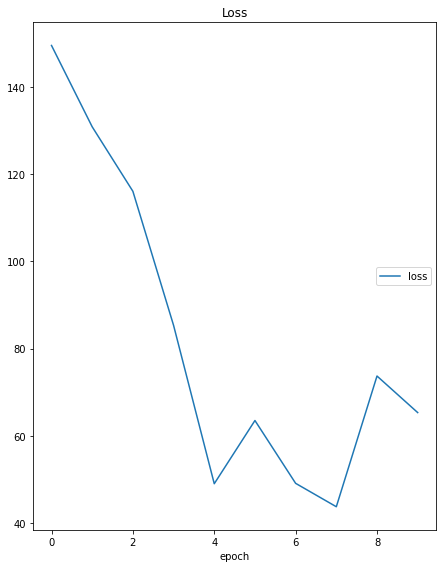

Loss
	loss             	 (min:   43.706, max:  149.571, cur:   65.316)


In [4]:
from utils.models import PendulumDynamicsModel, PendulumRewardModel
from utils.utils import train_model

# train target
model = PendulumRewardModel(num_features=4)  # numebr of inputer features
lr = 0.000001
num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss = nn.MSELoss()
model_name = 'test'
batch_size = 32
train_model(pendulum_reward_dataset, model, lr,
                num_epochs, optimizer,
                loss, batch_size, 
                model_name=model_name)


In [5]:
# load source model
model.load_state_dict(torch.load('saved_data/test.pth'))
model.eval()
print('models loaded successfully!')


models loaded successfully!


In [ ]:
import matplotlib.pyplot as plt

sim_all = [sim0, sim1, sim2, sim3]
x = [i for i in range(len(sim_all))]

plt.figure(figsize=(10, 8))
plt.scatter(x, sim_all, s=100, c='black')
plt.rcParams['axes.linewidth'] = 2.0
plt.xlabel('tasks', fontsize=18)
plt.ylabel('similarity', fontsize=18)
plt.xticks([0, 1, 2, 3], ['$sim(T_0, T_0)$', '$sim(T_0, T_1)$', '$sim(T_0, T_2)$', '$sim(T_0, T_3)$'], fontsize=18)
plt.show()